In [1]:
import pandas as pd

## Carregamento dos Dados

### Arquivos Disponíveis
- `hour.csv` - Contagem de bicicletas alugadas por hora (17.379 registros).
- `day.csv` - Contagem de bicicletas alugadas por dia (731 registros).

### Características do Conjunto de Dados
Os arquivos `hour.csv` e `day.csv` possuem os seguintes campos (exceto `hr`, que não está presente em `day.csv`):

- `instant`: índice do registro
- `dteday`: data
- `season`: estação do ano (1: primavera, 2: verão, 3: outono, 4: inverno)
- `yr`: ano (0: 2011, 1: 2012)
- `mnth`: mês (1 a 12)
- `hr`: hora do dia (0 a 23, apenas em `hour.csv`)
- `holiday`: indica se o dia é feriado (dados obtidos de [dchr.dc.gov](http://dchr.dc.gov/page/holiday-schedule))
- `weekday`: dia da semana
- `workingday`: indica se é um dia útil (1: dia útil, 0: fim de semana ou feriado)
- `weathersit`: situação climática:
  - 1: Céu limpo, poucas nuvens, parcialmente nublado
  - 2: Neblina + nublado, neblina + poucas nuvens
  - 3: Neve leve, chuva leve + trovoada + nuvens dispersas
  - 4: Chuva forte + tempestade, neve + neblina
- `temp`: temperatura normalizada (valores divididos por 41, temperatura máxima em Celsius)
- `atemp`: temperatura aparente normalizada (valores divididos por 50)
- `hum`: umidade normalizada (valores divididos por 100)
- `windspeed`: velocidade do vento normalizada (valores divididos por 67)
- `casual`: contagem de usuários ocasionais
- `registered`: contagem de usuários registrados
- `cnt`: total de bicicletas alugadas (casual + registered)


In [2]:
# Carregar o dataset
df = pd.read_csv("./data/hour.csv")

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
print(df.isnull().sum())
print(f"Dimensões do dataset: {df.shape}")

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Dimensões do dataset: (17379, 17)


## Seleção de Variáveis Relevantes

Removi colunas desnecessárias, como instant (índice do registro) e dteday (data), pois já tenho variáveis temporais separadas (mnth, hr, weekday, etc.). Também removi casual e registered, pois a variável alvo é cnt (total de bicicletas alugadas).

In [5]:
# Remover colunas desnecessárias
df = df.drop(columns=["instant", "dteday", "casual", "registered"])

# Verificar as colunas restantes
print(df.columns)

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


## Codificação de Variáveis Categóricas

As variáveis categóricas (season, weathersit, holiday, workingday) precisam ser codificadas para que possam ser usadas no modelo. Utilizei a técnica de one-hot encoding.

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Lista de variáveis categóricas
categorical_features = ['season', 'weathersit', 'holiday', 'workingday']

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Verificar o resultado
print(df_encoded.head())

   yr  mnth  hr  weekday  temp   atemp   hum  windspeed  cnt  season_2  \
0   0     1   0        6  0.24  0.2879  0.81        0.0   16     False   
1   0     1   1        6  0.22  0.2727  0.80        0.0   40     False   
2   0     1   2        6  0.22  0.2727  0.80        0.0   32     False   
3   0     1   3        6  0.24  0.2879  0.75        0.0   13     False   
4   0     1   4        6  0.24  0.2879  0.75        0.0    1     False   

   season_3  season_4  weathersit_2  weathersit_3  weathersit_4  holiday_1  \
0     False     False         False         False         False      False   
1     False     False         False         False         False      False   
2     False     False         False         False         False      False   
3     False     False         False         False         False      False   
4     False     False         False         False         False      False   

   workingday_1  
0         False  
1         False  
2         False  
3         Fals

##  Normalização de Variáveis Numéricas

As variáveis numéricas (temp, atemp, hum, windspeed, hr, mnth, weekday) foram normalizadas para que tenham a mesma escala.

In [7]:
from sklearn.preprocessing import StandardScaler

# Lista de variáveis numéricas
numeric_features = ['temp', 'atemp', 'hum', 'windspeed', 'hr', 'mnth', 'weekday']

# Aplicar normalização
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Verificar o resultado
print(df_encoded.head())

   yr      mnth        hr   weekday      temp     atemp       hum  windspeed  \
0   0 -1.610438 -1.670004  1.493891 -1.334648 -1.093281  0.947372  -1.553889   
1   0 -1.610438 -1.525374  1.493891 -1.438516 -1.181732  0.895539  -1.553889   
2   0 -1.610438 -1.380744  1.493891 -1.438516 -1.181732  0.895539  -1.553889   
3   0 -1.610438 -1.236115  1.493891 -1.334648 -1.093281  0.636370  -1.553889   
4   0 -1.610438 -1.091485  1.493891 -1.334648 -1.093281  0.636370  -1.553889   

   cnt  season_2  season_3  season_4  weathersit_2  weathersit_3  \
0   16     False     False     False         False         False   
1   40     False     False     False         False         False   
2   32     False     False     False         False         False   
3   13     False     False     False         False         False   
4    1     False     False     False         False         False   

   weathersit_4  holiday_1  workingday_1  
0         False      False         False  
1         False      Fal

## Divisão dos Dados em Treino e Teste
Separando 80% dos dados para treino e 20% para teste, utilizando random_state=42.

In [8]:
from sklearn.model_selection import train_test_split

# Definir variáveis preditoras (X) e variável alvo (y)
X = df_encoded.drop(columns=["cnt"])
y = df_encoded["cnt"]

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Verificar o tamanho dos conjuntos
print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

Treino: (13903, 16), Teste: (3476, 16)


### Salvamento dos Conjuntos de Teste
Salvando os dados de teste em arquivos CSV.

In [9]:
# Salvar conjuntos de teste
X_test.to_csv("./conjunto_teste/bike_test_features.csv", index=False)
y_test.to_csv("./conjunto_teste/bike_test_target.csv", index=False)


## Construção da Rede Neural MLP**

#### Definição da Arquitetura**

A rede neural MLP (Multilayer Perceptron) será composta por:

1. **Camadas de entrada**: O número de neurônios na camada de entrada será igual ao número de features (variáveis preditoras) após o pré-processamento.
2. **Camadas ocultas**: Utilizei duas camadas ocultas com um número razoável de neurônios (64 e 32).
3. **Camada de saída**: A camada de saída terá **1 neurônio**, pois estou resolvendo um problema de regressão (previsão de um valor contínuo).

As funções de ativação serão:
- **Camadas ocultas**: `ReLU` (Rectified Linear Unit).
- **Camada de saída**: `Linear`, usado para lidar com regressão.

#### Escolha do Otimizador e Função de Perda**

- **Otimizador**: `Adam` (Adaptive Moment Estimation).
- **Função de perda**: `Mean Squared Error (MSE)`.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir a arquitetura do modelo
model = Sequential()

# Camada de entrada e primeira camada oculta
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Segunda camada oculta
model.add(Dense(32, activation='relu'))

# Camada de saída (regressão)
model.add(Dense(1, activation='linear'))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Exibir resumo do modelo
model.summary()

2025-03-09 20:33:26.530796: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-09 20:33:26.537233: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-09 20:33:26.556092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741563206.579491   20737 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741563206.586334   20737 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 20:33:26.609634: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

## **Treinamento do Modelo**

### Treinamento Básico

In [11]:
# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=50,               # Número de épocas
    batch_size=32,           # Tamanho do batch
    validation_split=0.2,    # Separa 20% dos dados de treino para validação
    verbose=1                # Exibe o progresso do treinamento
)

Epoch 1/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 56274.7148 - val_loss: 20523.4785
Epoch 2/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20694.9883 - val_loss: 19787.0703
Epoch 3/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19819.1953 - val_loss: 19525.9434
Epoch 4/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19267.7520 - val_loss: 19394.4414
Epoch 5/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19230.6992 - val_loss: 19336.9531
Epoch 6/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19297.9473 - val_loss: 19196.4473
Epoch 7/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18955.4180 - val_loss: 19104.3535
Epoch 8/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18833.6289 - val_loss: 18909.5898
Epoch 9/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18875.1895 - val_loss: 18275.2461
Epoch 10/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17795.8145 - val_loss: 17222.2734
Epoch 11/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

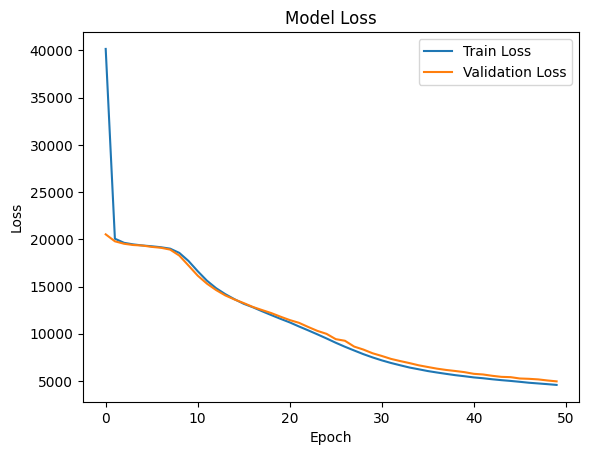

In [12]:
import matplotlib.pyplot as plt

# Plotar a perda de treino e validação
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Ajuste de Hiperparâmetros

- Número de camadas ocultas.
- Número de neurônios por camada.
- Taxa de aprendizado.
- Número de épocas.
- Tamanho do batch.

In [14]:
from tensorflow.keras.optimizers import Adam

# Definir uma nova arquitetura com mais camadas
model_tuned = Sequential()
model_tuned.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_tuned.add(Dense(64, activation='relu'))
model_tuned.add(Dense(32, activation='relu'))
model_tuned.add(Dense(1, activation='linear'))

# Compilar o modelo com uma taxa de aprendizado personalizada
model_tuned.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinar o modelo ajustado
history_tuned = model_tuned.fit(
    X_train, y_train,
    epochs=100,              # Mais épocas
    batch_size=64,           # Batch maior
    validation_split=0.2,
    verbose=1
)

Epoch 1/100


/home/diego/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 54037.5000 - val_loss: 20281.2168
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20276.5586 - val_loss: 19552.6191
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19380.5781 - val_loss: 19314.7695
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18838.5078 - val_loss: 19273.6289
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19598.7578 - val_loss: 18622.4902
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18218.0254 - val_loss: 17058.2070
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16461.4062 - val_loss: 14534.2754
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14069.7529 - val_loss: 13026.0293
Epoch 9/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12923.6709 - val_loss: 12019.0566
Epoch 10/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11824.7686 - val_loss: 11018.8184
Epoch 11/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

## Uso de Callbacks

Parar salvar o melhor modelo durante o treinamento.

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping: Interrompe o treinamento se a validação não melhorar após 10 épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model Checkpoint: Salva o melhor modelo durante o treinamento
model_checkpoint = ModelCheckpoint('./melhor_modelo/best_model.h5', monitor='val_loss', save_best_only=True)

# Treinar o modelo com callbacks
history_tuned = model_tuned.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/100
152/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1340.5713

174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1343.8411 - val_loss: 2038.9802
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1381.8412 - val_loss: 2091.9968
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1476.1440 - val_loss: 2085.1633
Epoch 4/100
164/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1299.0637

174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1301.2604 - val_loss: 1989.9054
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1380.1805 - val_loss: 1996.2631
Epoch 6/100
149/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1323.9427

174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1328.5048 - val_loss: 1989.7914
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1358.9663 - val_loss: 2102.9429
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1354.9690 - val_loss: 2044.9653
Epoch 9/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1272.1959 - val_loss: 2047.7478
Epoch 10/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1390.2803 - val_loss: 2132.1909
Epoch 11/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1268.0203 - val_loss: 1996.3414
Epoch 12/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1328.8027 - val_loss: 2399.2263
Epoch 13/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1347.7272 - val_loss: 2065.8665
Epoch 14/100
161/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1311.0194

174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1312.5950 - val_loss: 1937.9882
Epoch 15/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1257.7726 - val_loss: 2054.4421
Epoch 16/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1334.6146 - val_loss: 1987.8715
Epoch 17/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1342.2775 - val_loss: 2037.9099
Epoch 18/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1389.6620 - val_loss: 2013.2185
Epoch 19/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1305.1653 - val_loss: 1962.8977
Epoch 20/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1289.2114 - val_loss: 2137.6753
Epoch 21/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1301.9747 - val_loss: 1976.8235
Epoch 22/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1249.0699 - val_loss: 2075.6682
Epoch 23/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1361.8324 - val_loss: 2017.6189
Epoch 24/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1290.9207 -

## **5. Avaliação no Conjunto de Teste**

### Carregamento do Conjunto de Teste

In [17]:
# Carregar conjuntos de teste
X_test = pd.read_csv("./conjunto_teste/bike_test_features.csv")
y_test = pd.read_csv("./conjunto_teste/bike_test_target.csv")

Fazendo Previsões no Conjunto de Teste

In [18]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Cálculo das Métricas
Calculando as métricas de avaliação: MAE, MSE, RMSE e R².

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Exibir resultados
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Médio Absoluto (MAE): 43.98
Erro Quadrático Médio (MSE): 4521.84
Raiz do Erro Quadrático Médio (RMSE): 67.24
Coeficiente de Determinação (R²): 0.86


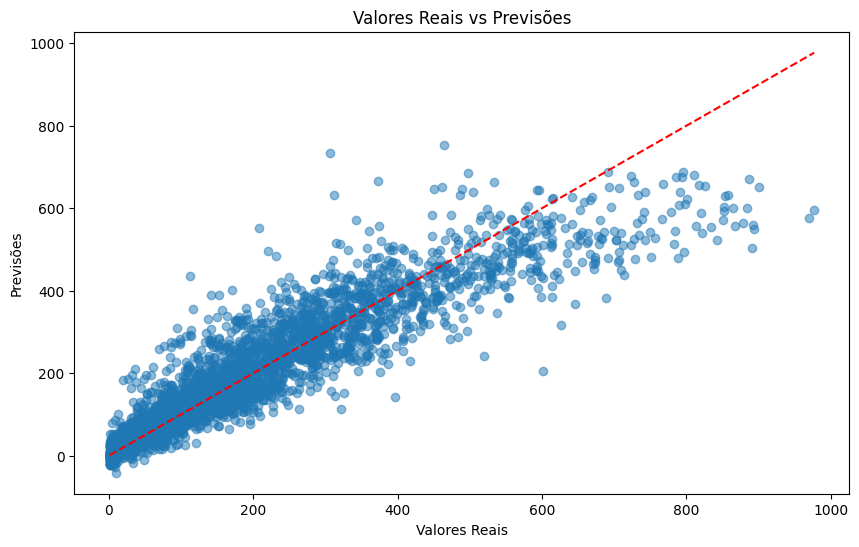

In [20]:
import matplotlib.pyplot as plt

# Plotar valores reais vs previsões
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de referência
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')
plt.show()

## Análise Geral
Desempenho do Modelo:
- O modelo tem um bom poder de explicação (R² = 0.86), o que significa que ele captura bem a relação entre as variáveis preditoras e o número de bicicletas alugadas.
- No entanto, os erros absolutos (MAE = 43.98 e RMSE = 67.24) sugerem que há espaço para melhorias, especialmente na redução de erros maiores.